# TME 7 : Mini-projet Detection de motifs


## Recherche de pattern (motifs) en utilisant les suffix trees

Nous allons utiliser l'algorithme suffix-tree pour la recherche rapide et éfficace de motifs. Un suffix-tree est construit à partir d'un jeux de séquences, ensuite nous pouvons rechercher le motif en temps O(k) où k est la longueur du motif.

1\. Nous allons réutiliser les fonctions du TME6 pour générer ``t`` séquences artificielles de taille ``n``, et implanter dans chaque séquence un motif de taille ``k`` à des positions aléatoires avec ``v`` substitutions choisies aléatoirement. Cependant, les ``t`` séquences artificielles initiales (sans implantation) ainsi que le motif initial (sans variation/mutation) doivent être générées une seule fois. Ensuite, selon chaque question, nous introduisons des différentes variation au motif initial et les implantons dans les séquences initiales afin de générer des nouveau jeux de données. 

In [1]:
import random
import numpy as np

nuc = ('A', 'C', 'G', 'T')

k=9 #taille de motif
v=0 #nb de positions variables dans le motif
t=50 #nb de sequences
n=100 #longuer des sequence

def generateRandomSequences(n, t):
    sequences = []
    i = 0
    j = 0
    while i < t:
        seq = ""
        while j < n:
            seq = seq+nuc[random.randint(0,3)]
            j += 1
        sequences.append(seq)
        i += 1
        j = 0
   
    return sequences

# RENVOIE UNE LISTE DE LISTE DE MOTIFS...
def generateMotifs(k, nM):
    return [generateRandomSequences(k, True) for rs in range(nM)]

def gen_n_substitMotifs(v, k, t):
    motifs = generateMotifs(k, t)    
    motifs_res = []
    for motif in motifs:
        lettre_motif = list(motif[0])
        j = 0
        while j < v:
            lettre_motif[random.randint(0, k - 1)] = nuc[random.randint(0,3)]
            motif_add = ''.join(lettre_motif)
            motifs_res.append(motif_add)
            j+=1
    return motifs_res
    
def implantMotifVar(k, v, t, n):
    #sequences aleatoires
    sequences = generateRandomSequences(n, t)
    if v != 0:
        motifs = gen_n_substitMotifs(v, k, t)
    else:
        motifs_generated = generateMotifs(k, 1)
        motifs = []
        # il faut remettre dans une simple liste vu QUE GENERATE_MOTIFS fait une liste de LISTE
        for liste_motif in motifs_generated:
            motifs = liste_motif
    modified_sequences = []
    i = 0
    while i < t:
        seq = sequences[i]
        if v != 0:
            motif = motifs[i]
        else:
            motif = motifs[0]
        rand_pos = random.randint(0,len(seq))
        seq = seq[0:rand_pos] + motif + seq[rand_pos+1:len(seq)]
        modified_sequences.append(seq)
        i+=1
    return motifs, modified_sequences


1.1\. Generer les séquences artificielles initiales et implanter un motif (sans variation, v=0)

In [2]:
#generate and implant variavel motifs
fix_motif, sequences = implantMotifVar(k, v, t, n)
print(fix_motif)
print (len(sequences[0]))

['GAGACAGAT']
108


2\. Définissez une fonction ``construct_tree`` pour construire un suffix tree à partir des séquences artificielles (après implantation) en utilisant le python package suffix-trees trouvable ici: https://pypi.org/project/suffix-trees/. Tester si votre fonction est capable de trouver le motif sans variation implanté.

In [3]:
from collections import Counter
m = 5

def removeLowComplexe(motifs, minrep):
    validMotif = []
    for motif in motifs:
        frequence = Counter(motif)
        # temoin pour savoir si une lettre est repetee ou non
        temoin = True
        for lettre, value in frequence.items():
            if value >= minrep:
                temoin = False
        if temoin == True:
            validMotif.append(motif)
                
    return validMotif

def removeLowComplexePair(motifs):
    validMotif = []
    for motif in motifs:
       frequence = Counter(motif)
       if len(frequence) > 2:
           validMotif.append(motif)

    return validMotif

In [10]:
from suffix_trees import STree
import time

sequence2 = ['CCTGCCACACCCTATACACACTAAAAAAGATCTTGAAAGGTCATGTCCCGGAAGGGGAGTCCTCACGTTTGATGTCTTCACTAACACGTCATAGTTCTACCAACACGGGAATGACTAC', 'CAAACAAGTTGAAATGCGACCTATGCCGCCAGGTTTATGGTAGTAATATTCGCGCTCGCCACTCTTCTGACCCCCCAATACACTATACACCCTATCGCAATTTCCACATGTTCACACT', 'GGACCACTGGCCCATCTTAGTTATGCGGGACTATCGAACCACCATGCGGCATGTCAACGGTCCAATTTGATTTTACCACTGACAGACTATACGCACTATCGACAGCGAACACTGGCCA', 'CGCTTTTTAGTGTTTCTCGCAAAATATGACACACCATACACACTCTATAGACATGTACTCATAGCTCTCACGGTGCAATGGGTGTTCGGCTGTTGCTCTCGTGGAAAAACTTGCTTAG', 'ACTGCTTAACAGACTATACACATTATGTGTCCTCTATTCCCACGCCGTAATACGCTACACCATAGCAGGCGTGAACGCTTGTGTCGGGGAACTGGCATAAGTGTCTATTCTAGATAGA', 'AGTCAACAAGAGGCTGCGTTATTCTCACTTGCCATGAACACGCTATACAGACTATACGGCAGGACATCTGCCCGCCGCGTGACTCACACAGTCAGCTCCCCTGACCAAGACCTCCCCG', 'TCAAGTGGGGGTGTGCCCTCGACCTTAGTTTGTCACACGTTTCGGCTGTCGCGATGTTTTGACATTCACTAGCTGATTCTTGACTGGCAACTGATATACACACCATACACAATATACC', 'TGGGTATTCGATGGTGGTGGAACACTTCTGTGCGACGGGGATCTACACATCGACTCACACTATCCACACTATGTTCCGCGCATATCAGACCAAAGATCCATTGGGGCAAACCAGATGA', 'ACCATACTCACTTTACCGGAAGCGACACGGATCCACACACTTTACACACTAAAGGCTGAGCCTATGTTTCAGATGTGGAACTTGGTATATTATGACCTGGTGTGAACCTCGAAGGAAA', 'TCTCTCCGATTGCAGGATCCTTACGTATACGCACTATACACACTACACGCACCCAGAGTTACTCGCTCTAGGTACAATGGGCGAAGGCCATAGGGATAGTGCTTCTGCATATACGAAC', 'TGAGCTAAGTGAGCTAATTATTTTCTGCCAGGCATTTAGTGTAATGGCTTAGGTCCACACACACTTTTCACACTATATCGTCATAACTGAGACGCTGAGTATTTGGAAAGTACATTGA', 'AGCTGGCATCTAAGGATGCGCATACGAGGCGGTATTTCGTAGCCTGCCCAGTGAAATGGATACACCCTATACAAACTATTATCCCCAGGGATAGCGGTCCCTGCTGGGCTGTACCCGT', 'CTCGCAAACATACTCCCTTCAGCCTTAACCGTCTCTTTGGTTCCTATCATGCCCATCTGGGGAGATGGCCAGAACACACTCTACACACTAATCTTTACCCCGTATTCGGCATGTAGCT', 'GGAGGTTACTGTGTTCTTCGCAAACCGTCCATCGTCTCCTCGGAGTTGTGGCCGCAGCTCGTTCCTCGTGTGTCGTGGTCGCAGGTACTCACTCACTATACACACAATGGGTGTGCCT', 'ATGTCACCCCCTGTGAGCGACCTAAGCTTGGGAGGGCGAATTCCCGCCTACTGGTAACACTAGCGAATCCCTGCCCTGGAAACCCACTATACACACTATGACCAATGGAAATGTTAAG', 'AGGCATTACCCACTATACACACTATGGCCTGCCTAATTCCCATTGGCCCATCTCGCTTTCTAACCATTATAACAACTGTCCCTTCATATGTAGGTTTTGCTCCTGCGACCCTCTGTGG', 'TCGTGGGGAGCCAGCGCTTTACCAAGGAGCATTCAGTACAGACTATCCACACTATAGAGGAACGTAGGCTCCGAAAGATGGAGTGCCCTTCTCAAGAGAGTTCGAGAAGTATTCAACA', 'TTGGCTAGCTAACATAAAATTTGAGTGCTCCCAATTGGGTTCCATCAGTTCTTTCGAATGGTACCCACTATGCACACTATCTAGGACTTCCGCAGTATCTGTTCGGCAACAGTACGGT', 'CCGTTTGACTTTGGGACACACTCTACACGCTATGTATAGGTTTAGTACTAGTTTCTCCAATATGCAAGTCAGAAAGGCTGTTTACGTTAGTTTAATCTGCCGAAGCTATCTCACGCTC', 'TCACTCGGTTGTGTAACCGTGCCGTCGCTCACCGTAGAATAACTGTCCTCGCTGAGATGGGGCAGGGATAAAATAATATTGAATATAGACAAGGTGCGACACTCTATACACACTAATC', 'GTTACCCCCTACCTAAGGGCCTTCTTAGTCGCACAGAACTTCCATTGTCAAATTTGGAGCGGGTGCCGAATTTATGAAGCCGACCCGAAGAGTAGACACATTATACACACGATTTTAA', 'CGCTCAAAGCTCCTGCGAGACAGCTCATGCTGTCCCTCATATACACTATACAAACTATGTCTCTTCGTTTTATGCCCGAGGAGTTTTTTGGAGGGGTTCCATGCTCTTAGAGCAGAAC', 'GCAGGGAGCATTAGACTTTATCCATAGGCTTTTCGCTGTCTGAGCGTCTTAAGAAACTCTATTTCCAGATGATTGACATACTATCCACACTATACAGGTCAAAGGCCTCCCCACCCAA', 'TCTCTTTCGATAACTCTCTCGGGGGAGGCTTGAACATAGTTATCTATCACCCCAGCAGCCCATGCTATCCCAGACACACAATATACACACTCTTCCGTGGGACCGGGATTGATAATTG', 'CGTTGTCACACTATACACACTAAGATGCAAGACCATGGATCTATAGATTTGTACCCTATAAGGACGTCATAAACCCGGTAAGAAGCGTCCTGTGAAGGTCGACACCGCCACTACGGCA', 'CGGTCCACTGCGGACTCTCGAAGAAAATAGGAGTGCGACAGGGAAGCAGACGGCTACACACGATACTCACTATACCCCCGTCTTCTGCTGGCCATTGACGGAGCTTTCTGTCTATAGC', 'CTGCATCACGTAGGGAGGTAATTTCGCTTACTACGCGACCGCGCTCCAACTTTGACACACTATACACACTCTTGGCATCTCGTGGCACCGGCGATTAAATTAGGCATGTTATTAGAGC', 'GCCTACACACTATACACACCATAGTTAGTTGCCCAGCGCAGATATTCGTACCTCCACTTAGAAATCTGTACTTCCTTAAACTTAGGGCGGGACACCCGTCATCTAAAGACCAGGTCAC', 'AACAAGATCGTTAGTTCGATGATTAAATTGGGAAAAATGCCCCGGTTGGGTTACGAGCTTTAAAAGTAAGGGTGACAACACACCATTCACACTATCAGCGTGACGGGTATATTTGCAG', 'TGAAATGGCTTCTCGACAGCTGATTTTTCGCACCGTTTTTGTGGACTGTCACTCTGTTTTCAATCCTGCTTAGTGTACACACAATACAAACTATGCAGCGCGACGCAATATAGATGTC', 'GTTGTTGTTAAAACCGCTATTAGCTGACTAACGGCCGCCTGCGGAGTAATTGGGACCTTATGGAGAGATTTATTCGAAGGGTACACCTGCATGGCACACCCTATACACACTATACAGG', 'GGGACAGTTGGCATTTAGTGTATGTACGCGGATCTCGCGCCTGGCGTCATAAATAACGATGTAAGACTCACTATACACAGTATCGGCATACTCTCTGCATATAGGCTGGTACATTATA', 'ATAAAACTGCCACCACGAGTTAATTCAAAGGCCCCTTGCGGAAACCGAATACACTATACACACTCTTTCAAGACCGTTTCAGTTAATAAAGGTCGATACGCGACCTCGCCGTAATGGT', 'CTGGTCCGTTTCACCTTGGGAAAGACAAGAAGGCAAACATACTATACACACCATGCTCCTATGTGAGTCAGAGGAGTCTATATCAACTGATGGAGAGCTTCCTGTCTATGGTGCCGGT', 'CCTTAGCACCAGAACCTGCCCCAAGTGTGTTTAAACAGTTCGCGCTTCAGTAGACCTATTGTTATGCTTGTTAAGCTACATACTATACCCACTATTCAATGTATCGGCGCTATGTTTC', 'AAAAAATATTGCGGATAGTCAGGAGGCCCCGCAGTACACACTATACATACTATCCCGGCTTCCTGAGTAGTGGAGGATGGGTTTCGGTGTAGCATGTAACGGAAGCCTGGGGGCTTGG', 'TAGGTGTTCTGATGAGAACAGGTTGGGCGACGACTTCTGGGCATACCAAGCTCAACACGGGACACTACTTATAATAAACGTCGCCCCGCGGCAGACACTATACACACTACTGTGAGTG', 'GTCTAACTCTAAGCTCACAGTGAATGTTGGACACACTATACACACCATTTTTTGAAAAGATGCACCCCCCTACCCAATCCCATGTCCACGCGGGCCTTTGCAGTGGCCGGCACTGTGT', 'CGTGGGGTGATATCTGCCTGGTGTTCACACTATACGCACTATTCCTAGATTCTTTCGTAGGGGGCCAGCGCTGAGTCTGACCGCGCGACAGACAGATGGGAAAAAGCACTGGATGCTA', 'ATGGCTGACTAATTGTAATAAACACTATCCACACTATCACGGATAGTCGTGGCTCGCATATTCAGCATCACGAGCGTGTAAAGACCGTCGTAAAGTGAACGGACGTCAAGAGAAAACA', 'TGCACATACACACAATACACACTAAAAATCCCAACGACGATAAACCTAGGGGAGCTTTTCAGCCCATATCCAGCTCACGCTCATTCGGGGGGAAGTCAACAGAGAAAAATGTATGCGG', 'GCATAGGTAGTGGTTTGCCATGTACACAGTATACACACAATCGCGAACCTGGAGGATAAAAATTACATACCCTCGCGTGCTGTCGCGCGGGATAGGTGGCCGGGGCTCAGCCTGGGAT', 'CGAACTACGGTTTTGAGCATGAGTTAGAGCATCCAGTCAAGCACACACACAATATACACTATGCGTGCTCCCATGCGAGCTCACGACTCCCGCACACTTAGTTGCAAACCCCTCATTC', 'CATACATAAGAAAAGGCTTAGACGTAATAACAGACTATACACACTCTTCTTGAGGTAAGCTTCTTTCTCTCGATAACAAACAACGCCGATACGCCGCGCGCGCGTTCGCCGTCTAGGT', 'GACTTAGAACGGGTTAGACTCGAAACCGATAGTTGAGTGAGTTAACACACTAAACACGCTATCGCCAGTGTCAGCGCAAATGTACGCATACTCAGATACATCCTGTAAAAGATGTACT', 'CATGCCTATGGAGACAGACACTATACACACTATGATGGGCTGAAACAGTGTTTCGGCCAGAGGGGGCCTGACGTACCGATGCGAATTTTAATGGCGGGCCGGTCGCCCTGCCAACGGA', 'ATAATAAACGAAATCTTGAGCGGATACGGTAATGGAAACTTAGTGGTCCGACGAGTGGATCGCGAGAACGTTAACACCCTATACACACTAGGCGACCCGACGTTAAAATACGTTAAAT', 'GTAATTCTGTCTGGCGACCGAAACGCCCAAATATTCCTCGGGCTGCACACATTATACACAATATCCAGGCCGAAGTACCCACCATTCAGTAACATACATTATGCTCGGCGTCCAAGCA', 'GCGTTGTTTGCTGTTCTCAAGGGAGCTGAAGTGAATTTTACTCGCATGCTCATTGAAAAAACAACACACTATACACAGTATCGCGAGGCTAAGCCACGAGGGATGCTTGGTAACGAGC', 'TGTCCAAACACCCTATACAGACTATTGCTTGCGATGGTATGCCAGACGCACGCAATGCTCGATGATCGACGCTGAAGTCTCGCATTGCCAAGAGGGCTCCGGCAAACTCTTTTTGGCG']

#st = STree.STree("abcdefghab")
#print(st.find("abc")) # 0
#print(st.find_all("ab")) # [0, 8]

def construct_tree(sequences):
    return STree.STree(sequence)

start = time.time()
tree = construct_tree(sequence)
res = tree.find_all('ACACACTAT')
print(res)
end = time.time()
print(end-start)


{5379, 4200, 1801, 3148, 5775, 3217, 4433, 3674, 1756}
0.03750467300415039


3\. Avant de chercher les motifs, implémentez ou reutilisez les fonctions pour générer tous les motifs (k-mer) possibles de taille k, en éliminant les motifs peu complexe pour éviter les calculs inutiles.

In [81]:
def generateKmers(sequences, k):
    validkmers = [] # liste qui va contenir une liste des motifs possibles sur la sequence en fonction de la position de depart
    for seq in sequences:
        kmer_seq = []
        i = 0
        while i < (len(seq) - k + 1):
            kmer_seq.append(seq[i: i + k]) # on ajoute chaque motif de taille k
            i += 1
        validkmers += kmer_seq # on ajoute la liste de liste de motifs a la liste que l'on retourne

    return validkmers

kmersValid = generateKmers(sequences, k)
#print(len(kmersValid))
kmersValid = removeLowComplexe(kmersValid, m)
kmersValid = removeLowComplexePair(kmersValid)
print(kmersValid)
#print(len(kmersValid))

GTA', 'GAAGGGTAT', 'AAGGGTATT', 'AGGGTATTA', 'GGGTATTAG', 'GGTATTAGC', 'GTATTAGCG', 'TATTAGCGC', 'ATTAGCGCA', 'TTAGCGCAA', 'TAGCGCAAT', 'AGCGCAATG', 'GCGCAATGA', 'CGCAATGAC', 'GCAATGACC', 'CAATGACCT', 'AATGACCTA', 'ATGACCTAA', 'TGACCTAAC', 'GACCTAACG', 'ACCTAACGC', 'CCTAACGCT', 'CTAACGCTA', 'TAACGCTAT', 'AACGCTATA', 'ACGCTATAA', 'CGCTATAAC', 'GCTATAACT', 'CTATAACTT', 'TATAACTTC', 'ATAACTTCT', 'AACTTCTTC', 'ACTTCTTCC', 'CCTTTTGCA', 'CTTTTGCAC', 'TTTTGCACA', 'TTTGCACAC', 'TTGCACACC', 'TGCACACCA', 'GCACACCAA', 'CACACCAAT', 'ACACCAATC', 'ACCAATCCA', 'CCAATCCAA', 'CAATCCAAC', 'ATCCAACAG', 'TCCAACAGC', 'CCAACAGCT', 'CAACAGCTT', 'AACAGCTTG', 'ACAGCTTGT', 'CAGCTTGTA', 'AGCTTGTAT', 'GCTTGTATG', 'CTTGTATGG', 'TTGTATGGG', 'TGTATGGGC', 'GTATGGGCA', 'TATGGGCAG', 'CAGGCGTGC', 'AGGCGTGCT', 'GCGTGCTGC', 'CGTGCTGCT', 'GTGCTGCTG', 'TGCTGCTGA', 'GCTGCTGAG', 'CTGCTGAGT', 'TGCTGAGTT', 'GCTGAGTTT', 'CTTGATACT', 'TTGATACTA', 'TGATACTAA', 'GATACTAAT', 'ATACTAATT', 'TACTAATTC', 'ACTAATTCG', 'CTAATTCGC', 'TAATT

4\. **Exact matching:** Définissez la fonction ``exact_match`` qui cherche dans le suffix tree tous les motifs possibles (k-mers), générés à la question precedent. La fonction renvoie un dictionnaire qui contient les motifs (keys) et leurs nombre d'occurrence (values). Ce dictionnaire doit être trié par nombre d'occurrences. 

Ensuite, trouvez et affichez les 10 motifs plus fréquents dans notre jeux de données artificiels.

In [82]:
import time

def exact_match(kmersV, stree):
    motif_occur = {}
    for kmer in kmersV:
        positions = stree.find_all(kmer)
        for pos in positions:
            if kmer not in motif_occur:
                motif_occur[kmer] = 1
            else:
                motif_occur[kmer] += 1

    return motif_occur


st = construct_tree(sequences)
start = time.time()
motif_occur_sorted = exact_match(kmersValid, st)
end = time.time()
print("durée exec exact match = {}".format(end - start))
for keys,values in motif_occur_sorted.items():
    if values!=1: #Beaucoup motifs qui valent 1
        print((keys,values))


durée exec exact match = 0.030505895614624023
('ATTGAAGTC', 9)
('TTGAAGTCT', 25)
('TGAAGTCTT', 256)
('GAAGTCTTT', 2500)
('TTATGAAGT', 4)
('TATGAAGTC', 4)
('ATGAAGTCT', 36)
('AAGTCTTTG', 144)
('AGTCTTTGG', 25)
('GCGAAGTCT', 4)
('CGAAGTCTT', 169)
('AAGTCTTTC', 100)
('AGTCTTTCA', 16)
('GTCTTTCAG', 4)
('TGCCTACGG', 4)
('ATAAACCCC', 4)
('CCGGAGCGC', 4)
('CTCGAAGTC', 9)
('TCGAAGTCT', 16)
('AAGACTGAC', 4)
('AGACTGACG', 4)
('ACGAAGTCT', 16)
('TCTCGGATA', 4)
('CTCGGATAT', 4)
('TCGTCTACT', 4)
('CTGTAGGAG', 4)
('CGGAAGTCT', 25)
('GGAAGTCTT', 100)
('AAGTCTTTA', 121)
('AGTCTTTAG', 9)
('GGAGTACCC', 4)
('GTCGGTGAA', 4)
('GTGAAGTCT', 4)
('CTACGTATA', 4)
('TACGTATAC', 4)
('ACGTATACA', 4)
('AGGGAAGTC', 4)
('GGGAAGTCT', 9)
('GAGACTCAA', 4)
('AGACTCAAT', 4)
('CCGAAGTCT', 9)
('AGTCTTTAC', 4)
('AGTCTTTGA', 9)
('GTCTTTGAC', 4)
('CTGAAGTCT', 4)
('TCGGTAATA', 4)
('CGGTAATAG', 4)
('ACGGAAGTC', 4)
('CGTCTTGTA', 4)
('CGAGAAGTC', 4)
('GAGAAGTCT', 9)
('AGAAGTCTT', 100)
('TAGAAGTCT', 16)
('AGTCTTTCG', 9)
('CAGAAGTCT

5\. Avez-vous réussi à trouver votre motif initial implanté en séquences? l'algorithme était-il rapide? Faites attention aux valeurs élevées des variable k, t, et n par rapport aux TMEs précedants. Quelle est la complexité de chaque recherche de motif? 

Nous avons retrouvé notre motif initial. L'algorithme etait rapide. Pour trouver le nombre d'occurences d'un motif on fait (nb_occurences du motif) tour de boucles.

6\. Introduisez deux variation (v=2) au motif initial. Pour cela avant de chaque implantation, créez d'abord un motif varié (avec v substitutions choisies aléatoirement) à partir du motif initial et puis implantez-le dans une séquence. Repetez pour chaque sequence dans le Jeux de donnée. Il suffit de mettre ``v`` égal ``2`` et réutiliser les fonctions définies à la question 1.

In [83]:
v=2
print(fix_motif[0])
def modify_motif(motif,v):
    j=0
    motif=list(motif)
    while j < v:
        motif[random.randint(0, k - 1)] = nuc[random.randint(0,3)]
        j+=1
    return ''.join(motif)

print(modify_motif(fix_motif[0],v))

sequencetmp=generateRandomSequences(n, t)
sequence2=[]
for seq in sequencetmp:
    rand_pos = random.randint(0,len(seq))
    seq = seq[0:rand_pos] + modify_motif(fix_motif[0],v) + seq[rand_pos+1:len(seq)]
    sequence2.append(seq)

print(len(sequence2[0]))
with open("sequences.fasta", "w") as file:
    for seq in sequence2:
        file.write(seq+"\n")
    



GAAGTCTTT
GAAGTCTTT
108


7\. Construisez le suffix tree à nouveau à partir des nouvelles séquences en utilisant le python package suffix-trees.

In [84]:
tree = construct_tree(sequence2)
tree.find_all(fix_motif[0])

{478, 612, 1373, 1684, 3496, 4924}

8\. **Inexact matching:** 

Définissez fonction ``inexact_match`` qui cherche tous les motifs possibles (k-mers) générés à la question 2 dans le nouveau suffix tree donné (construit à partir des nouvelle séquences qui incluent le motif varié), et renvoie un dictionnaire qui contient les motifs (keys) et les listes de toutes leurs variations (values) ainsi que le meilleur motif variable. Il faut que vous utilisiez la algorithm *seed* pour trouver le motif variable. 

Ensuite, affichez le meilleur motif variable avec toutes son variation dans notre nouveaux jeux de données artificiels.

In [85]:
kmersValid = generateKmers(sequence2, k)
#print(len(kmersValid))
kmersValid = removeLowComplexe(kmersValid, m)
kmersValid = removeLowComplexePair(kmersValid)
#print(kmersValid)
def hamdist(v, x):
	"""
	hyp : v et x sont de meme taille
	"""
	if len(v) != len(x):
		print("Erreur : v et x de taille diff\n")
		return -1
	v = v.upper() # on remet en maj les string
	x = x.upper()
	diffs = 0
	i = 0
	while i < len(v):
		if v[i] != x[i]: # si deux lettres different a un endroit on incremente diff
			diffs += 1
		i += 1

	return diffs

def inexact_match(kmersV, sequences, stree, v,k):
    text = ''.join(sequences)
    Ns = v + 1
    Ls = k//Ns 
    dict_motifs = {}
    for kmer in kmersV:
        if kmer not in dict_motifs:
            i = 0
            allCandidates = []
            while i < Ns - 1:
                seed = kmer[i*Ls : i*Ls + Ls] 
                candidateIndex = tree.find_all(seed)
                for index in candidateIndex:
                    candidateText = text[index - i * Ls:index + k - i * Ls]
                    if (len(candidateText) == k) and hamdist(candidateText, kmer) <= v:
                        allCandidates.append(candidateText)
                i=i+1
            dict_motifs[kmer] = allCandidates
    return dict_motifs

start = time.time()
dict_ = inexact_match(kmersValid,sequence2,tree,v,k)
end = time.time()
print("durée exec inexact match = {}".format(end - start))

maxvalues=0
for keys,values in dict_.items():
    if len(values)>maxvalues:
        maxvalues=len(values)
        key,val=keys,values
print(key,val)


durée exec inexact match = 1.389744520187378
TTGGAGTCT ['TTGGAGTCT', 'TTGGAGTAC', 'TTGCAGTGT', 'TTGGAGTCT', 'TTGGAGTAC', 'TCGAAGTCT']


9\. Créez le motif logo à partir des séquences du meilleur motif variable que vouz venez de trouver. Vous pouvez utilizer ce site: https://weblogo.berkeley.edu/logo.cgi. Affichez votre logo ci-dessous.

In [72]:
with open("motifs.fasta","w") as file:
    file.write(key+"\n")
    for variable in val:
        file.write(variable+"\n")


Motif LOGO:  


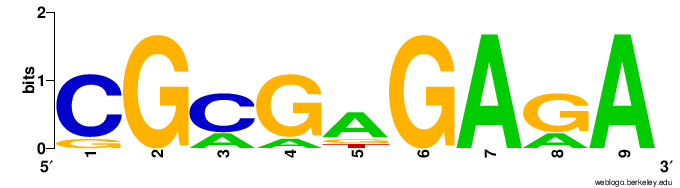

In [74]:
from IPython.display import Image
Image(filename='motifs.png') 

10\. Avez-vous réussi à trouver votre motif initial implanté en séquences? l'algorithme était-il rapide? Quelle est la complexité de chaque recherche de motif?

Non, nous n'avons pas réussi à retrouver le motif initial. L'algorithme était trois fois plus lent que le exact match. Cela est du a la complexite de la recherche de motif qui est maintenant de (v + 1) * nb_positions_motif. v + 1 etant egal a 3, c'est pour cela que l'algorithme est environ trois fois plus lent. Cependant les temps d'execution restent raisonnables sur les petites sequences : 1.10 sec

11\. Tester l'algorithme  suffix tree sur vos données de chipSeq. Puis générér le LOGO du motif trouvé

In [91]:
def readFasta(genome):
    sequence = []
    file = open(genome, "r")
    sequences = []
    seq = ""
    for s in file:
        if s[0] != ">":
            seq += s.strip().upper()
        else:
            sequences.append(seq)
            seq = ""
    return sequences[1:]
genome = "Sequence_by_Peaks_6.fasta" #votre fichier
sequences_peaks = readFasta(genome)
#print(sequences)

In [95]:
start = time.time()
dict_ = inexact_match(kmersValid,sequences_peaks,tree,v,k)
end = time.time()
print("durée exec inexact match sur peaks = {}".format(end - start))

maxvalues=0
for keys,values in dict_.items():
    if len(values)>maxvalues:
        maxvalues=len(values)
        key,val=keys,values
print(key,val)

durée exec inexact match sur peaks = 1.4247500896453857
GTCTTGCAC ['GTGTAGCAC', 'ACCTTGCAC', 'GTGTAGCAC', 'GTCTTAAAC']


In [96]:
with open("motifs_peaks.fasta","w") as file:
    file.write(key+"\n")
    for variable in val:
        file.write(variable+"\n")


12\. Créez le motif logo à partir des séquences du meilleur motif variable que vouz venez de trouver. Vous pouvez utilizer ce site: https://weblogo.berkeley.edu/logo.cgi. Affichez votre logo ci-dessous.


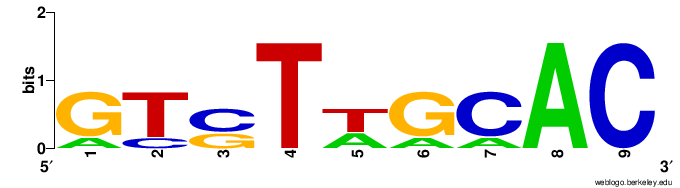

In [97]:
Image(filename='motifs_peaks.png') 